# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [2]:
# Definindo a matriz de transformação
m = np.array([[0.5, -1],
              [0.5, 1]])

# Aplicando a transformação (Multiplicação Matricial)
# O dataframe df contém p1 e p2
df_transf = np.matmul(df[['p1', 'p2']].values, m)
df_transf = pd.DataFrame(df_transf, columns=['média', 'diferença'])

corr_orig = df.corr()
print(f"Correlação p1 e p2: {corr_orig.iloc[0,1]:.4f}")
# O resultado será próximo de 0.89 (alta correlação positiva)

corr_transf = df_transf.corr()
print(f"Correlação média e diferença: {corr_transf.iloc[0,1]:.4f}")
# O resultado será próximo de 0.13 (baixa correlação)

# As variáveis originais p1 e p2 possuem uma correlação muito alta, o que indica que alunos que vão bem em uma prova tendem a ir bem na outra. Ao aplicar a transformação linear para média e diferença, a correlação é drasticamente reduzida. Isso ocorre porque a transformação "rotaciona" os eixos dos dados, isolando a tendência comum (média) da variação individual entre as provas (diferença).


Correlação p1 e p2: 0.8957
Correlação média e diferença: 0.1335


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

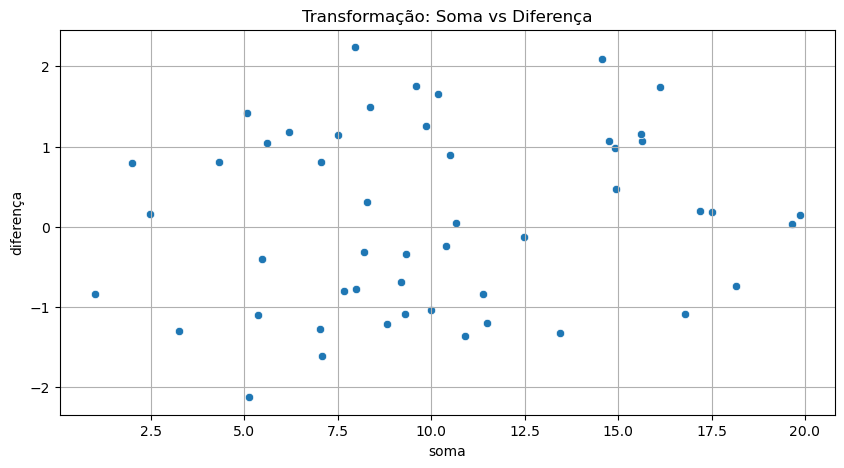

In [3]:
# Matriz para Soma e Diferença
m2 = np.array([[1, -1],
               [1, 1]])

# Transformação
df_soma_diff = np.matmul(df[['p1', 'p2']].values, m2)
df_soma_diff = pd.DataFrame(df_soma_diff, columns=['soma', 'diferença'])

# Gráfico
plt.figure(figsize=(10, 5))
sns.scatterplot(x='soma', y='diferença', data=df_soma_diff)
plt.title('Transformação: Soma vs Diferença')
plt.grid(True)
plt.show()